In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data_df = pd.read_csv('/content/drive/MyDrive/Data.csv')
data_df.head()

,Timestamp,station,PM2.5,PM10,address,city,latitude,longitude,state
0,2017-01-01,"32Bungalows, Bhilai - CECB",NaN,NaN,"Bhilai RO Office, 5, 32 Bungalows, Bhilai, Dis...",Bhilai,21.194815,81.314770,Chhattisgarh
1,2017-01-01,"AIIMS, Raipur - CECB",NaN,NaN,"All India Institute Of Medical Science, Gate N...",Raipur,21.258815,81.578979,Chhattisgarh
2,2017-01-01,"Adarsh Nagar, Jaipur - RSPCB",NaN,NaN,"Psychiatric Centre, Janta Colony, Govind Marg,...",Jaipur,26.902909,75.836858,Rajasthan
3,2017-01-01,"Airoli, Navi Mumbai - MPCB",NaN,54.743723,NaN,Navi Mumbai,19.149400,72.998600,Maharashtra
4,2017-01-01,"Airport Area, Indore - IMC",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
ncap_funding_df = pd.read_csv('/content/drive/MyDrive/NCAP_Funding.csv')
ncap_funding_df.head()

,S. No.,State,City,Amount released during FY 2019-20,Amount released during FY 2020-21,Amount released during FY 2021-22,Total fund released,Utilisation as on June 2022
0,1,Andhra Pradesh,Vijaywada,6,-,-,6.00,22.91
1,2,Andhra Pradesh,Guntur,0.12,0.76,1.96,2.84,22.91
2,3,Andhra Pradesh,Kurnool,0.06,0.76,1.36,2.18,22.91
3,4,Andhra Pradesh,Nellore,0.06,0.76,1.92,2.74,22.91
4,5,Andhra Pradesh,Visakhapatnam,0.12,-,-,0.12,22.91


In [5]:
state_data_df = pd.read_csv('/content/drive/MyDrive/State_data.csv')
state_data_df.head()

,State,Population,Area (km2)
0,Uttar Pradesh,199812341,240928
1,Maharashtra,112374333,307713
2,Bihar,104099452,94163
3,West Bengal,91276115,88752
4,Madhya Pradesh,72626809,308252


# 1) Spatial Aggregation

##### Q1. Which state (consider all stations in that state) has the highest average PM2.5 concentration across all stations and across all years?


In [6]:
data_df = pd.read_csv('/content/drive/MyDrive/Data.csv')

# Finding average PM2.5 values of all states
state_avg_pm25 = data_df.groupby('state')['PM2.5'].mean()

# Locating the state with highest avg PM2.5 value
highest_pm25_state = state_avg_pm25.idxmax()

print(f'''The state with highest average PM2.5 concentration
across all stations and years is: {highest_pm25_state}''')

The state with highest average PM2.5 concentration
across all stations and years is: Delhi


##### Q2.  Which state (consider all stations in that state) had the most days with hazardous PM2.5 levels (above 300 µg/m³) for the year 2023?


In [7]:
data_df = pd.read_csv('/content/drive/MyDrive/Data.csv')

# Converting 'Timestamp' to datetime format
data_df['Timestamp'] = pd.to_datetime(data_df['Timestamp'], format = '%Y-%m-%d')

# Filtering data for the year 2023
df_2023 = data_df[data_df['Timestamp'].dt.year == 2023]

# Filtering for hazardous PM2.5 levels
mask = df_2023['PM2.5'] > 300
hazardous_days = df_2023[mask]

# Counting hazardous days for each state
state_hazardous_days = hazardous_days.groupby('state').size()

# Finding state with max hazardous days
max_hazardous_days_state = state_hazardous_days.idxmax()

print(f'''The state with most days with hazardous PM2.5 levels
for the year 2023 was: {max_hazardous_days_state}''')

The state with most days with hazardous PM2.5 levels
for the year 2023 was: Delhi


##### Q3. Which state has the highest variability in PM2.5 levels across its monitoring stations in 2023? (Think how would you measure variability)


In [8]:
data_df = pd.read_csv('/content/drive/MyDrive/Data.csv')

# Converting 'Timestamp' to datetime format
data_df['Timestamp'] = pd.to_datetime(data_df['Timestamp'], format = '%Y-%m-%d')

# Filtering data for the year 2023
df_2023 = data_df[data_df['Timestamp'].dt.year == 2023]

# Grouping by state and calculating the standard deviation of PM2.5 levels
state_pm25_std = df_2023.groupby('state')['PM2.5'].std()

# Finding the state with the highest PM2.5 variability
highest_variability_state = state_pm25_std.idxmax()

print(f"The state with highest variability in PM2.5 levels in 2023 was: {highest_variability_state}")

The state with highest variability in PM2.5 levels in 2023 was: Delhi


##### Q4. Which state has the lowest average PM2.5 levels during the Covid period (The year 2020-2021 both years inclusive)?

In [9]:
data_df = pd.read_csv('/content/drive/MyDrive/Data.csv')

# Converting 'Timestamp' to datetime format
data_df['Timestamp'] = pd.to_datetime(data_df['Timestamp'], format = '%Y-%m-%d')

# Filtering data for the years 2020 and 2021
df_covid = data_df[data_df['Timestamp'].dt.year == (2020 | 2021)]

# Grouping and finding average PM2.5 levels for each state during covid
state_avg_pm25 = df_covid.groupby('state')['PM2.5'].mean()

# Finding state with lowest avg Pm2.5 levels
lowest_avg_pm25_state = state_avg_pm25.idxmin()

print(f'''The state with lowest average PM2.5 levels
during the Covid period was: {lowest_avg_pm25_state}''')

The state with lowest average PM2.5 levels
during the Covid period was: Meghalaya


# 2) Temporal Aggregation

##### Q1. Report the station that recorded the highest value of PM 2.5 for the month Aug of 2020.


In [33]:
data_august_2020 = data_df[(data_df['Timestamp'].dt.year == 2020) & (data_df['Timestamp'].dt.month == 8)]

highest_pm_august = data_august_2020.loc[data_august_2020['PM2.5'].idxmax()]

highest_pm_august_station = highest_pm_august['station']
highest_pm_august_state = highest_pm_august['state']
highest_pm_august_value = highest_pm_august['PM2.5']

print(f"The station with the highest PM2.5 value in August 2020 is {highest_pm_august_station} in {highest_pm_august_state} with the value of {highest_pm_august_value} µg/m³")

The station with the highest PM2.5 value in August 2020 is Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB in Karnataka with the value of 805.51 µg/m³


##### Q2. For the year 2018, calculate the average PM2.5 concentration for each season (Seasons being Winter: December-February, Summer: March-May, and Monsoon: June-September) for stations Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB. Identifying the season with the highest pollution.
[Thought Question] Can you suggest some potential factors on why certain seasons are generally more polluted than others?


In [11]:
data_df = pd.read_csv('/content/drive/MyDrive/Data.csv')

# Converting 'Timestamp' to datetime format
data_df['Timestamp'] = pd.to_datetime(data_df['Timestamp'], format = '%Y-%m-%d')

# Filtering data for 2018
df_2018 = data_df[data_df['Timestamp'].dt.year == 2018]

# Filtering data for the specified station
station_name = "Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB"
df_station = df_2018[df_2018['station'] == station_name].copy()

# Defining seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Summer'
    elif month in [6, 7, 8, 9]:
        return 'Monsoon'

# Creating a new column for season
df_station['Season'] = df_station['Timestamp'].dt.month.apply(get_season)

# Grouping by season and calculating average PM2.5 concentration
season_avg_pm25 = df_station.groupby('Season')['PM2.5'].mean()

# Finding season with highest pollution
highest_pm25_season = season_avg_pm25.idxmax()

print(f'''The season with the highest pollution for the year 2018
for station {station_name} was: {highest_pm25_season}''')

print('''\nThe possible reasons are:
* Seasonal pollution differences arise from weather patterns, human activities,
  and natural processes.
* Winter sees higher pollution due to temperature inversions, stagnant air,
  and heating emissions.
* Summer experiences ozone spikes from sunlight-driven reactions and wildfires,
  while spring brings agricultural emissions and pollen.
* Autumn adds pollution from decaying vegetation and leaf burning, with rainfall
  and wind also influencing air quality.''')


The season with the highest pollution for the year 2018
for station Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB was: Winter

The possible reasons are:
* Seasonal pollution differences arise from weather patterns, human activities,
  and natural processes.
* Winter sees higher pollution due to temperature inversions, stagnant air,
  and heating emissions.
* Summer experiences ozone spikes from sunlight-driven reactions and wildfires,
  while spring brings agricultural emissions and pollen.
* Autumn adds pollution from decaying vegetation and leaf burning, with rainfall
  and wind also influencing air quality.


##### Q3. Compare the average PM2.5 levels during weekends and weekdays for the station Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB over the year 2021. Create a plot to show these trends Steps:

*   Calculate the monthly average PM2.5 for weekdays and weekends separately
*   X-axis: Months (January to December).
*   Y-axis: Average PM2.5 levels.
*   Use two lines: one for the monthly average PM2.5 levels on weekdays and one for weekends.


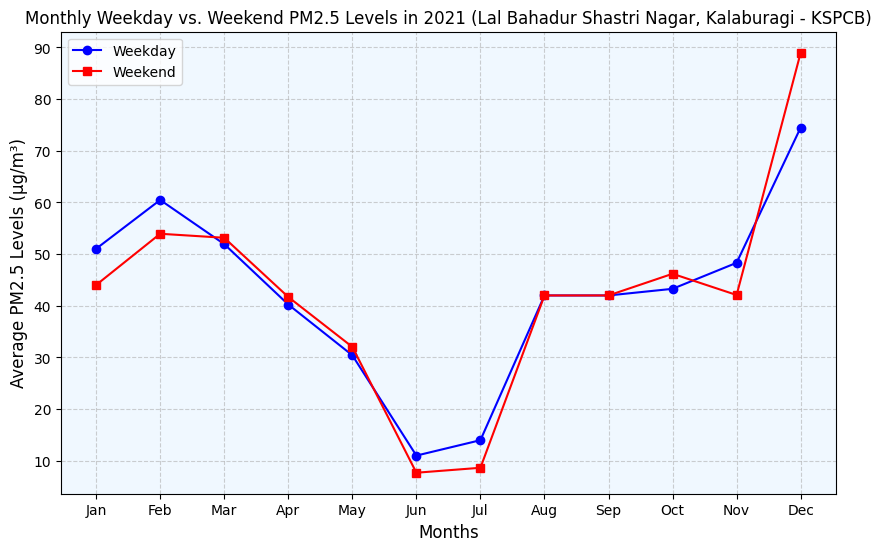

In [12]:
data_df = pd.read_csv('/content/drive/MyDrive/Data.csv')

# Filling NaN values in Pm2.5 column
data_df['PM2.5'] = data_df['PM2.5'].fillna(data_df['PM2.5'].median())

# Converting 'Timestamp' to datetime format
data_df['Timestamp'] = pd.to_datetime(data_df['Timestamp'], format = '%Y-%m-%d')

# Filtering data for 2021
df_2021 = data_df[data_df['Timestamp'].dt.year == 2021]

# Filtering data for the specified station
station_name = "Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB"
df_station = df_2021[df_2021['station'] == station_name].copy()

# Creating columns with day type and month
df_station['Day Type'] = df_station['Timestamp'].dt.weekday.apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')
df_station['Month'] = df_station['Timestamp'].dt.month

# Calculate the monthly average PM2.5 for weekdays and weekends separately
monthly_avg_pm25 = df_station.groupby(['Month', 'Day Type'])['PM2.5'].mean().unstack()

# Plotting the graph
plt.figure(figsize = (10,6))
plt.plot(monthly_avg_pm25.index, monthly_avg_pm25['Weekday'], marker='o', label='Weekday', color='b')
plt.plot(monthly_avg_pm25.index, monthly_avg_pm25['Weekend'], marker='s', label='Weekend', color='r')

plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.xlabel('Months', fontsize=12)
plt.ylabel('Average PM2.5 Levels (µg/m³)', fontsize=12)
plt.title(f'Monthly Weekday vs. Weekend PM2.5 Levels in 2021 ({station_name})')

plt.gca().set_facecolor('#f0f8ff')
plt.legend()

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# 3) Spatio-temporal aggregation

##### Q1. For each state, calculate the percentage increase or decrease in PM2.5 levels during monsoon months (June to September) compared to summer months (March to May). Which state has the most difference (increase or decrease) for the year 2022?

In [34]:
data_df = pd.read_csv('/content/drive/MyDrive/Data.csv')

# Converting Timestamp to datetime format
data_df["Timestamp"] = pd.to_datetime(data_df["Timestamp"], format = '%Y-%m-%d')

# Filtering data for the year 2022
df_2022 = data_df[data_df["Timestamp"].dt.year == 2022].copy()

# Defining summer and monsoon months
summer_months = [3, 4, 5]
monsoon_months = [6, 7, 8, 9]

# Filtering data for summer and monsoon months
df_2022 = df_2022[df_2022["Timestamp"].dt.month.isin(summer_months + monsoon_months)]

# Creating a new column for season
df_2022['Season'] = df_2022['Timestamp'].dt.month.apply(lambda x: 'Summer' if x in summer_months else 'Monsoon')

# Grouping by state and season
season_pm25 = df_2022.groupby(['state', 'Season'])['PM2.5'].mean().unstack()

# Calculating percent change for each state
season_pm25['Percentage_Change'] = ((season_pm25['Monsoon'] - season_pm25['Summer']) / season_pm25['Summer']) * 100
display(season_pm25)

# Finding the state with the highest absolute percentage change
most_difference_state = season_pm25["Percentage_Change"].abs().idxmax()

# Display result
print(f"\nState with most difference in PM2.5 levels: {most_difference_state}")

Season,Monsoon,Summer,Percentage_Change
state,,,
Andhra Pradesh,19.355510,30.128540,-35.756894
Arunachal Pradesh,15.069892,32.116292,-53.077110
Assam,21.872292,56.337647,-61.176419
Bihar,35.642356,75.834868,-53.000042
Chandigarh,32.758585,59.695914,-45.124242
Chhattisgarh,19.871696,22.321561,-10.975330
Delhi,42.769572,95.667628,-55.293579
Gujarat,35.852728,65.113078,-44.937747
Haryana,41.922458,81.727661,-48.704688



State with most difference in PM2.5 levels: Assam


##### Q2. Plot the average PM2.5 levels for Delhi across each season (Winter: December-February, Summer: March-May, Monsoon: June-September) from 2017 to 2023. What seasonal variation, if any, can you observe in pollution levels?


<Figure size 1000x1000 with 0 Axes>

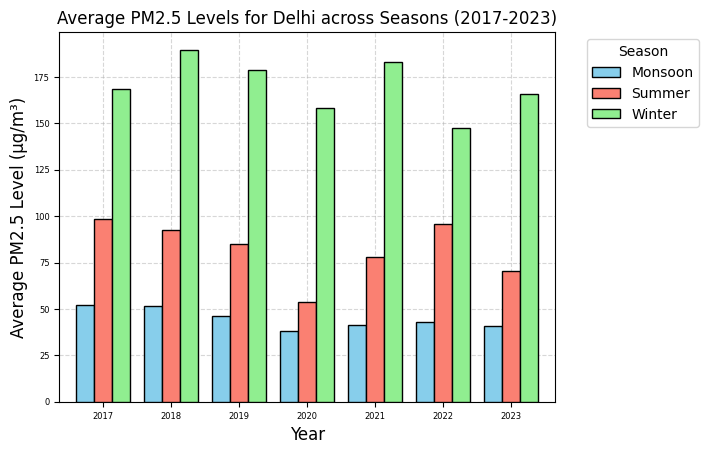


Delhi's PM2.5 levels typically show strong seasonal variation:
* Winter (Dec–Feb): Highest pollution levels due to temperature inversion, low wind speed, and increased biomass burning.
* Summer (Mar–May): Moderate pollution levels, with better dispersion due to stronger winds and higher temperatures.
* Monsoon (Jun–Sep): Lowest pollution levels, as rain helps wash out pollutants.
=> Winter consistently has the worst air quality, while monsoon sees the cleanest air.



In [14]:
data_df = pd.read_csv('/content/drive/MyDrive/Data.csv')

# Converting Timestamp to datetime format
data_df["Timestamp"] = pd.to_datetime(data_df["Timestamp"], format = '%Y-%m-%d')

# Filtering data for delhi
df_delhi = data_df[(data_df["state"] == "Delhi") &
                   (data_df["Timestamp"].dt.year.isin(range(2017, 2024))) &
                   (data_df["Timestamp"].dt.month.isin([1,2,3,4,5,6,7,8,9,12]))].copy()

# Creating new column for season and year
df_delhi['Season'] = df_delhi['Timestamp'].dt.month.apply(lambda x: 'Winter' if x in [12, 1, 2]
                                                          else 'Summer' if x in [3, 4, 5]
                                                          else 'Monsoon')
df_delhi['Year'] = df_delhi['Timestamp'].dt.year

# Grouping by station and season
season_pm25 = df_delhi.groupby(['Year','Season'])['PM2.5'].mean().unstack()

# Plotting the graph
plt.figure(figsize=(10,10))
season_pm25.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'], edgecolor='k', fontsize=6, width=0.8, zorder=3)
plt.title('Average PM2.5 Levels for Delhi across Seasons (2017-2023)', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average PM2.5 Level (µg/m³)', fontsize=12)
plt.legend(title='Season', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.5, linestyle='--', zorder=0)
plt.show()

print('''\nDelhi's PM2.5 levels typically show strong seasonal variation:
* Winter (Dec–Feb): Highest pollution levels due to temperature inversion, low wind speed, and increased biomass burning.
* Summer (Mar–May): Moderate pollution levels, with better dispersion due to stronger winds and higher temperatures.
* Monsoon (Jun–Sep): Lowest pollution levels, as rain helps wash out pollutants.
=> Winter consistently has the worst air quality, while monsoon sees the cleanest air.
''')

##### Q3. Plot a time-series graph comparing Delhi’s PM2.5 levels with Mumbai’s from 2015 to 2023. Which city had more fluctuations? (Hint: Think what fluctuation means)


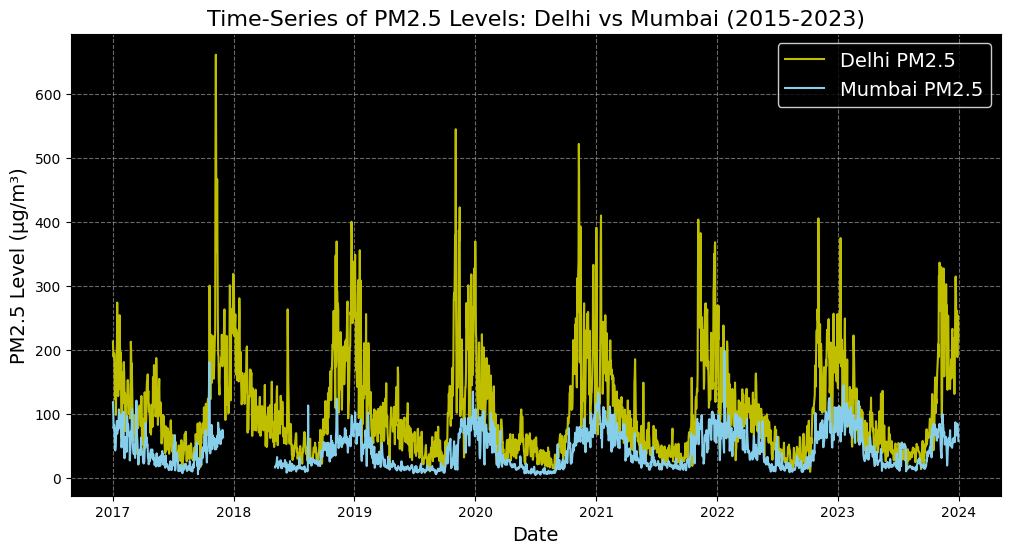

In [15]:
data_df = pd.read_csv('/content/drive/MyDrive/Data.csv')

# Converting Timestamp to datetime format
data_df["Timestamp"] = pd.to_datetime(data_df["Timestamp"], format = '%Y-%m-%d')

# Filtering data for Delhi and Mumbai (2015 to 2023)
df_delhi = data_df[(data_df['state'] == 'Delhi') & (data_df['Timestamp'].dt.year.isin(range(2015, 2024)))]
df_mumbai = data_df[(data_df['city'] == 'Mumbai') & (data_df['Timestamp'].dt.year.isin(range(2015, 2024)))]

# Grouping by 'Timestamp' and calculating the mean PM2.5 levels for each day
df_delhi_daily = df_delhi.groupby('Timestamp')['PM2.5'].mean()
df_mumbai_daily = df_mumbai.groupby('Timestamp')['PM2.5'].mean()

# Plotting the time-series graph
plt.figure(figsize=(12,6))
plt.plot(df_delhi_daily, label='Delhi PM2.5', color='y')
plt.plot(df_mumbai_daily, label='Mumbai PM2.5', color='skyblue')

# Add labels and title
plt.title('Time-Series of PM2.5 Levels: Delhi vs Mumbai (2015-2023)', fontsize=16)
plt.gca().set_facecolor('k')
plt.xlabel('Date', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.ylabel('PM2.5 Level (µg/m³)', fontsize=14)
plt.legend(fontsize = 14 , edgecolor = 'white', facecolor='black' , labelcolor  = 'white')

plt.show()

# 4) Population-Based

##### Q1. Which state in India has the highest number of monitoring stations relative to its population?


In [16]:
data_df = pd.read_csv('/content/drive/MyDrive/Data.csv')

state_data_df = pd.read_csv('/content/drive/MyDrive/State_data.csv')

stations_df = data_df.groupby('state')['station'].nunique().reset_index()
stations_df.columns = ['State', 'Station Count']

merged_df = pd.merge(stations_df, state_data_df[['State', 'Population']], on='State')
merged_df['Stations per Capita'] = merged_df['Station Count'] / merged_df['Population']
highest_stationdensiity_state = merged_df.loc[merged_df['Stations per Capita'].idxmax(), 'State']

print(f'''The state in India with the highest number of monitoring stations
relative to its population is: {highest_stationdensiity_state}''')

The state in India with the highest number of monitoring stations
relative to its population is: Chandigarh


##### Q2. Plot a bar chart showing the top 5 most polluted states in terms of per capita PM2.5 exposure in 2023.


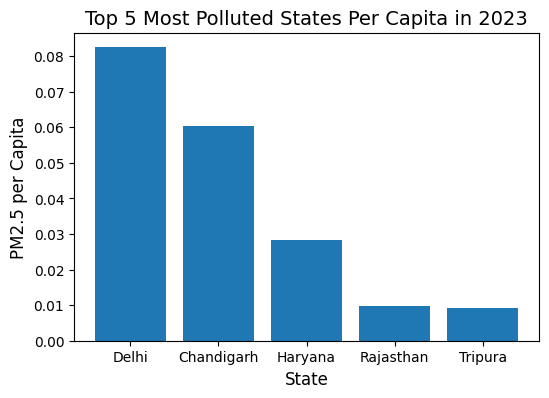

In [17]:
data_df = pd.read_csv('/content/drive/MyDrive/Data.csv')
state_data_df = pd.read_csv('/content/drive/MyDrive/State_data.csv')

# Converting Timestamp to datetime format
data_df["Timestamp"] = pd.to_datetime(data_df["Timestamp"], format = '%Y-%m-%d')

# Filtering data for 2023
df_2023 = data_df[data_df["Timestamp"].dt.year == 2023].copy()

df_2023_pm25 = df_2023.groupby('state')['PM2.5'].sum().reset_index()
df_2023_pm25.columns = ['State', 'PM2.5']

df_population = state_data_df[['State', 'Population']]

merged_df = pd.merge(df_2023_pm25, df_population, on='State')
merged_df['PM2.5 per Capita'] = merged_df['PM2.5'] / merged_df['Population']
merged_df.sort_values(by='PM2.5 per Capita', ascending=False, inplace=True)

top_5_states = merged_df.head(5)

plt.figure(figsize=(6, 4))
plt.bar(top_5_states['State'], top_5_states['PM2.5 per Capita'])
plt.xlabel('State', fontsize=12)
plt.ylabel('PM2.5 per Capita', fontsize=12)
plt.title('Top 5 Most Polluted States Per Capita in 2023', fontsize=14)
plt.show()

##### Q3. Plot the relationship between population density and average PM2.5 concentration for each state. What conclusion can you draw about the correlation between population density and pollution?

*  X-axis: Population density (people per square kilometer).
*  Y-axis: Average PM2.5 concentration.
*  Use a scatter plot to show the relationship, where each point represents a state.


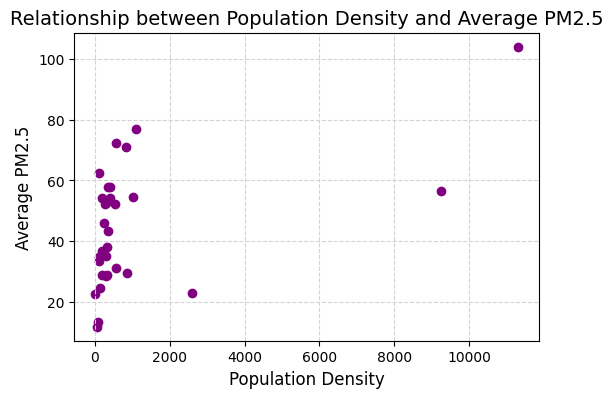

In [18]:
data_df = pd.read_csv('/content/drive/MyDrive/Data.csv')
state_data_df = pd.read_csv('/content/drive/MyDrive/State_data.csv')

avg_pm25 = data_df.groupby('state')['PM2.5'].mean().reset_index()
avg_pm25.columns = ['State', 'Average PM2.5']

state_pop_dens = state_data_df[['State', 'Population', 'Area (km2)']]
state_pop_dens['Population Density'] = state_pop_dens['Population'] / state_pop_dens['Area (km2)']
merged_df = pd.merge(avg_pm25, state_pop_dens, on='State')

plt.figure(figsize=(6,4))
plt.scatter(merged_df['Population Density'], merged_df['Average PM2.5'], color='purple')
plt.grid('True', color = 'lightgray', linestyle = '--')
plt.xlabel('Population Density', fontsize=12)
plt.ylabel('Average PM2.5', fontsize=12)
plt.title('Relationship between Population Density and Average PM2.5', fontsize=14)
plt.show()

# 5) Area Based

##### Q1. Which state has the highest PM2.5 concentration per square kilometer? Plot the pollution levels for all states relative to their area.

*   X-axis: States.
*   Y-axis: PM2.5 concentration per square kilometer.
*  Use a bar plot where each bar represents a state, and the height shows PM2.5 per sq km.

The state with the highest PM2.5 concentration per square kilometer is: Chandigarh



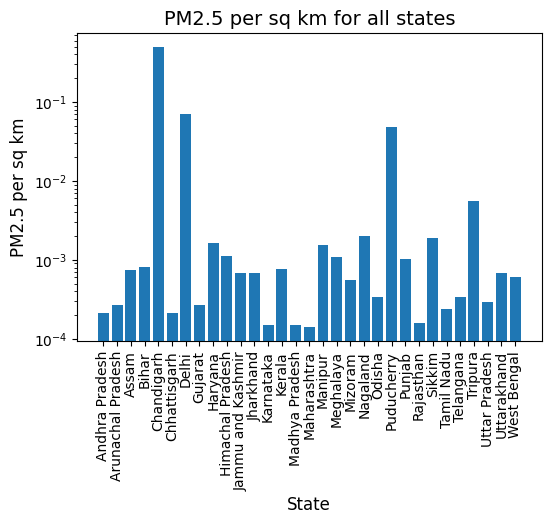

In [19]:
data_df = pd.read_csv('/content/drive/MyDrive/Data.csv')
data_df.head()

avg_pm25 = data_df.groupby('state')['PM2.5'].mean().reset_index()
avg_pm25.columns = ['State', 'Average PM2.5']

merged_df = pd.merge(avg_pm25, state_data_df[['State', 'Area (km2)']], on='State')
merged_df['PM2.5 per sq km'] = merged_df['Average PM2.5'] / merged_df['Area (km2)']

highest_pm25_per_sqkm_state = merged_df.loc[merged_df['PM2.5 per sq km'].idxmax(), 'State']

print(f'''The state with the highest PM2.5 concentration per square kilometer is: {highest_pm25_per_sqkm_state}\n''')

plt.figure(figsize = (6, 4))
plt.bar(merged_df['State'], merged_df['PM2.5 per sq km'])
plt.xlabel('State', fontsize=12)
plt.xticks(rotation=90)
plt.ylabel('PM2.5 per sq km', fontsize=12)
plt.yscale('log')
plt.title('PM2.5 per sq km for all states', fontsize=14)
plt.show()

##### Q2. Compare the total number of monitoring stations per square kilometer in each state. Identify the state with the highest density of monitoring stations relative to its area. Show a bar plot where each bar represents a state, and the height shows the number of monitoring stations per square kilometer.


The state with the highest density of monitoring stations
relative to its area is: Delhi



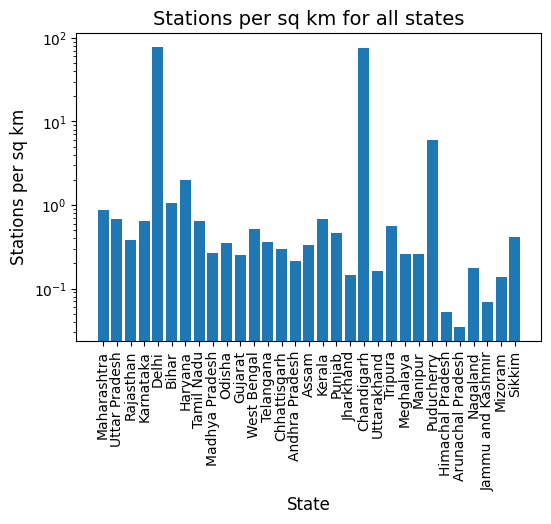

In [20]:
data_df = pd.read_csv('/content/drive/MyDrive/Data.csv')
data_df.head()

state_station_counts = data_df['state'].value_counts().reset_index()
state_station_counts.columns = ['State', 'Station Count']

merged_df = pd.merge(state_station_counts, state_data_df[['State', 'Area (km2)']], on='State')
merged_df['Stations per sq km'] = merged_df['Station Count'] / merged_df['Area (km2)']

highest_station_density_state = merged_df.loc[merged_df['Stations per sq km'].idxmax(), 'State']

print(f'''The state with the highest density of monitoring stations
relative to its area is: {highest_station_density_state}\n''')

plt.figure(figsize = (6, 4))
plt.bar(merged_df['State'], merged_df['Stations per sq km'])
plt.xlabel('State', fontsize=12)
plt.xticks(rotation=90)
plt.ylabel('Stations per sq km', fontsize=12)
plt.yscale('log')
plt.title('Stations per sq km for all states', fontsize=14)
plt.show()

##### Q3. Compare the average PM2.5 levels between Maharashtra and Madhya Pradesh over the year 2021. Given that both states have similar area sizes but different population densities, analyze how population density impacts pollution levels in these two states.



In [21]:
data_df = pd.read_csv('/content/drive/MyDrive/Data.csv')
data_df.head()

# Converting 'Timestamp' to datetime format
data_df['Timestamp'] = pd.to_datetime(data_df['Timestamp'], format='%Y-%m-%d')

# Filtering data for 2021 and the two states
df_2021 = data_df[(data_df['Timestamp'].dt.year == 2021) & (data_df['state'].isin(['Maharashtra', 'Madhya Pradesh']))]

# Computing average PM2.5 levelsfor both state
print("Comparing average PM2.5 levels between Maharashtra and Madhya Pradesh over the year 2021:")
avg_pm25 = df_2021.groupby(['state'])['PM2.5'].mean()
display(avg_pm25)

print('''\nBoth Maharashtra (365 people/km²) and Madhya Pradesh (236 people/km²) have similar
land areas, but MP has higher PM2.5 levels despite its lower population density.
This suggests that population density alone is not the main driver of pollution.
Higher population density does not always mean higher pollution. MP’s higher PM2.5
levels are mainly due to industrial emissions, landlocked geography, and
biomass burning, not just population density. ''')

Comparing average PM2.5 levels between Maharashtra and Madhya Pradesh over the year 2021:


,PM2.5
state,
Madhya Pradesh,47.095952
Maharashtra,46.440044



Both Maharashtra (365 people/km²) and Madhya Pradesh (236 people/km²) have similar
land areas, but MP has higher PM2.5 levels despite its lower population density.
This suggests that population density alone is not the main driver of pollution.
Higher population density does not always mean higher pollution. MP’s higher PM2.5
levels are mainly due to industrial emissions, landlocked geography, and
biomass burning, not just population density. 


# 6) Funding Based

##### Q1. Compare the average PM2.5 levels between states that received NCAP funding and those that did not in 2021.

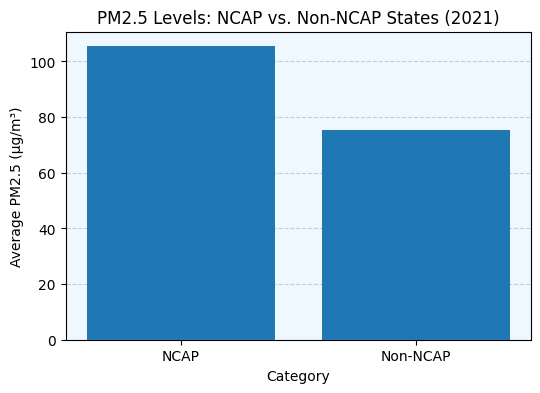

In [22]:
# Converting 'Timestamp' to datetime and filtering for 2021
data_df['Timestamp'] = pd.to_datetime(data_df['Timestamp'], format='%Y-%m-%d')
df_2021 = data_df[data_df['Timestamp'].dt.year == 2021]
avg_pm25_2021 = df_2021.groupby('state')['PM2.5'].mean().reset_index()

# Filtering for states that received NCAP funding
ncap_states = ncap_funding_df[ncap_funding_df['Amount released during FY 2021-22'] != '-']['State'].unique()

avg_pm25_2021['NCAP_Status'] = avg_pm25_2021['state'].apply(lambda x: "NCAP" if x in ncap_states else "Non-NCAP")

plt.figure(figsize=(6, 4))
plt.bar(avg_pm25_2021['NCAP_Status'], avg_pm25_2021['PM2.5'], zorder = 3)

# Formatting
plt.xlabel("Category")
plt.ylabel("Average PM2.5 (µg/m³)")
plt.title("PM2.5 Levels: NCAP vs. Non-NCAP States (2021)")
plt.xticks(rotation=0)
plt.gca().set_facecolor('#f0f8ff')
plt.grid(axis="y", linestyle = '--', alpha=0.6, zorder = 0)
plt.show()

##### Q2. Create a time series plot showing PM2.5 levels with an increment in NCAP funding for Assam. Has an increment of the financing led to noticeable improvements in air quality?


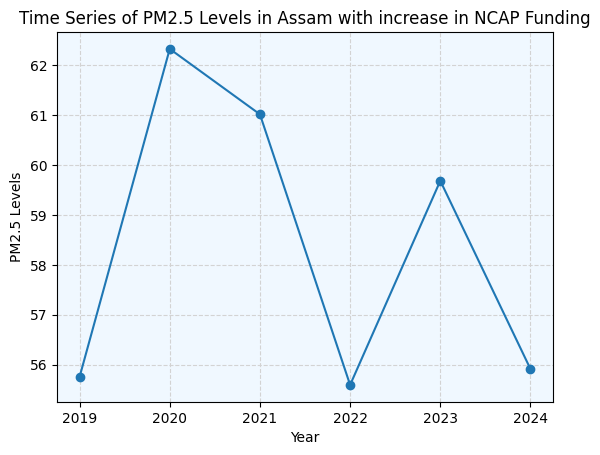

In [23]:
df_Assam = data_df[data_df['state'] == 'Assam'].groupby(data_df['Timestamp'].dt.year)['PM2.5'].mean().reset_index()
plt.plot(df_Assam['Timestamp'], df_Assam['PM2.5'], marker='o', linestyle='-')
plt.title('Time Series of PM2.5 Levels in Assam with increase in NCAP Funding')
plt.xlabel('Year')
plt.ylabel('PM2.5 Levels')
plt.grid(True, linestyle = '--', color = 'lightgray')
plt.gca().set_facecolor('#f0f8ff')
plt.show()

##### Q3. Create a scatter plot to showcase the area versus funding received by a state. Mark every state with a different color and show the legend outside the plot.


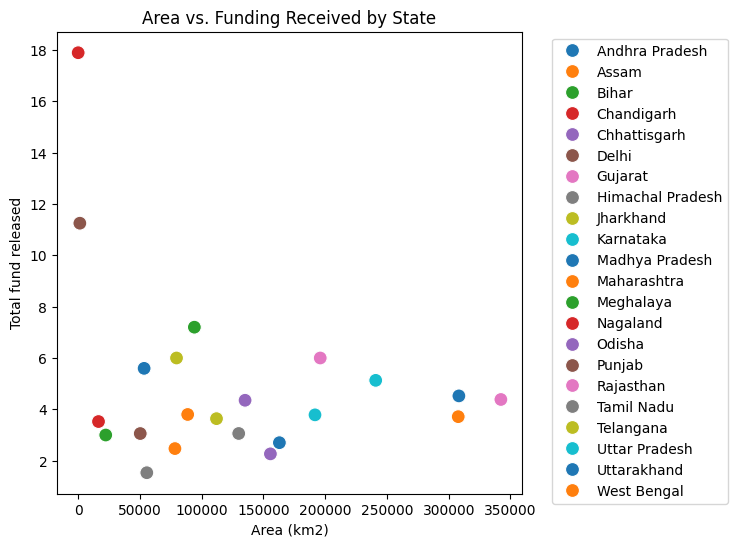

In [24]:
ncap_funding_df = pd.read_csv('/content/drive/MyDrive/NCAP_Funding.csv')
ncap_funding_df.head()

avg_ncap = ncap_funding_df.groupby('State')['Total fund released'].mean().reset_index()
state_area = state_data_df[['State', 'Area (km2)']]
merged_df = pd.merge(avg_ncap, state_area, on='State')

plt.figure(figsize=(6, 6))
sns.scatterplot(data=merged_df, x='Area (km2)', y='Total fund released', hue='State', palette='tab10', s=100)
plt.xlabel('Area (km2)')
plt.ylabel('Total fund released')
plt.title('Area vs. Funding Received by State')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

# 7) Miscellaneous Questions

##### Q1. For the most polluted city in 2023 (highest average pollution in 2023), calculate the percentage of days with PM2.5 levels above the hazardous threshold (300 µg/m³)

In [25]:
data = pd.read_csv("/content/drive/MyDrive/Data.csv")
data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%Y-%m-%d')
data_2023 = data[data['Timestamp'].dt.year == 2023]

# Calculate average PM2.5 levels per city and find the most polluted city
most_polluted_city = df_2023.groupby("city")["PM2.5"].mean().idxmax()

#Filtering data for most polluted city
data_most_polluted_city = data_2023[data_2023["city"] == most_polluted_city]

#Filter days with PM2.5 > 300
hazardous_days = data_most_polluted_city[data_most_polluted_city["PM2.5"] > 300]

percentage_hazardous_days = (len(hazardous_days) / len(data_most_polluted_city)) * 100

print(f'''Percentage of days with PM2.5 levels above the hazardous threshold (300 µg/m³)
for the most polluted city ({most_polluted_city}) in 2023: {percentage_hazardous_days:.2f}%''')

Percentage of days with PM2.5 levels above the hazardous threshold (300 µg/m³)
for the most polluted city (Darbhanga) in 2023: 0.82%


##### Q2. Analyze the PM2.5 levels in Delhi during Diwali (October-November) and New Year compared to regular months over the 3 years (2018-2020). Do you observe any significant pollution spikes during these festivals? If spikes are observed, Can you mark these spikes using arrows?

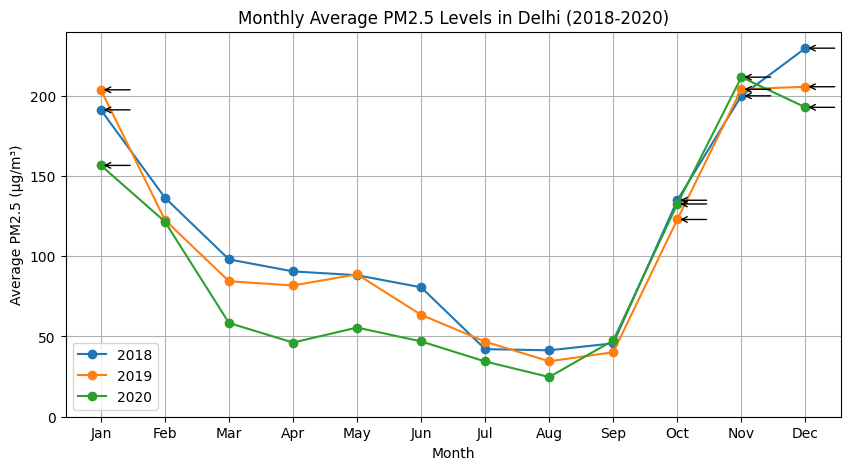

In [26]:
data_df = pd.read_csv("/content/drive/MyDrive/Data.csv")

# Convert 'Timestamp' to datetime and extract relevant parts
data_df['Timestamp'] = pd.to_datetime(data_df['Timestamp'], format='%Y-%m-%d')
data_df['Year'] = data_df['Timestamp'].dt.year
data_df['Month'] = data_df['Timestamp'].dt.month

# Filter data for Delhi
df_delhi = data_df[data_df['state'] == "Delhi"]

# Filter for years 2018-2020
df_delhi = df_delhi[df_delhi['Year'].isin(range(2018, 2021))]

# Compute monthly average PM2.5
monthly_avg_pm25 = df_delhi.groupby(['Year', 'Month'])['PM2.5'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 5))
for year in [2018, 2019, 2020]:
    subset = monthly_avg_pm25[monthly_avg_pm25['Year'] == year]
    plt.plot(subset["Month"], subset["PM2.5"], marker="o", linestyle="-", label=f"{year}")

# Marking Diwali (Oct-Nov) and New Year (Dec-Jan) spikes with arrows
highlight_months = [10, 11, 12, 1]  # Oct, Nov (Diwali) and Dec, Jan (New Year)
for year in [2018, 2019, 2020]:
    for month in highlight_months:
        pm_value = monthly_avg_pm25[(monthly_avg_pm25["Year"] == year) & (monthly_avg_pm25["Month"] == month)]['PM2.5']
        if not pm_value.empty:
            plt.annotate("",  # No text, just an arrow
                         xy=(month, pm_value.values[0]),  # End of arrow (actual data point)
                         xytext=(month + 0.5, pm_value.values[0]),  # Start of arrow (diagonal shift)
                         arrowprops=dict(arrowstyle="->", color='k'))

# Labels and title
plt.xlabel("Month")
plt.ylabel("Average PM2.5 (µg/m³)")
plt.yticks(range(0, 250, 50))
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.title("Monthly Average PM2.5 Levels in Delhi (2018-2020)")
plt.legend(loc='best')
plt.grid(True)
plt.show()

##### Q3. Identify the state that received the highest NCAP funding in 2020 and determine if its air pollution levels improved significantly by 2023. Use a line graph to compare yearly average PM2.5 trends.

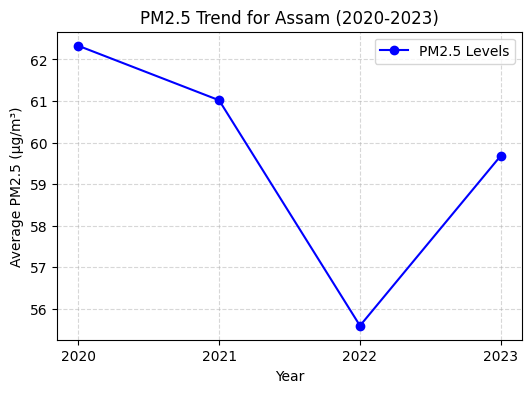

In [27]:
ncap_funding_df = pd.read_csv('/content/drive/MyDrive/NCAP_Funding.csv')
data_df = pd.read_csv('/content/drive/MyDrive/Data.csv')

highest_funded_state = ncap_funding_df.groupby('State')['Amount released during FY 2020-21'].sum().idxmax()

# Converting 'Timestamp' to datetime
data_df['Timestamp'] = pd.to_datetime(data_df['Timestamp'], format='%Y-%m-%d')

# Filtering data for the highest funded state from 2020 to 2023
df_highest_funded = data_df[(data_df['state'] == highest_funded_state) & (data_df['Timestamp'].dt.year.isin(range(2020, 2024)))]

# Computing yearly average PM2.5 levels
pm25_trend = df_highest_funded.groupby(df_highest_funded['Timestamp'].dt.year)['PM2.5'].mean().reset_index()

# Plotting
plt.figure(figsize=(6,4))
plt.plot(pm25_trend["Timestamp"], pm25_trend["PM2.5"], marker="o", linestyle="-", color="blue", label="PM2.5 Levels")
plt.xlabel("Year")
plt.xticks(range(2020, 2024, 1))
plt.ylabel("Average PM2.5 (µg/m³)")
plt.title(f"PM2.5 Trend for {highest_funded_state} (2020-2023)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

##### Q4. Draw the map of India and plot the sensor locations on the map.

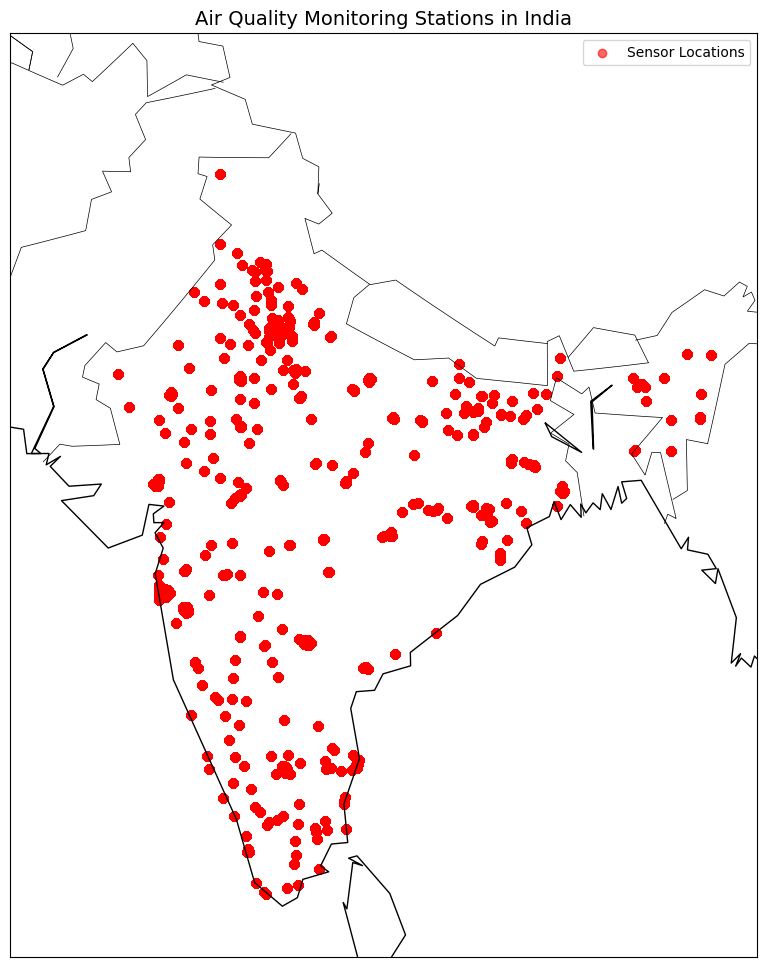

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

data_df = pd.read_csv("/content/drive/MyDrive/Data.csv")

# Drop rows with missing latitude/longitude
sensor_data = data_df.dropna(subset=['latitude', 'longitude'])

# Create a figure
fig, ax = plt.subplots(figsize=(10, 12))

# Define the map boundaries (approximate for India)
m = Basemap(projection='lcc', resolution='c',
            lat_0=20, lon_0=78,
            llcrnrlon=68, llcrnrlat=6,
            urcrnrlon=98, urcrnrlat=38,
            ax=ax)

# Draw map details
m.drawcoastlines()
m.drawcountries()
m.drawstates()

# Convert latitude and longitude to map coordinates
x, y = m(sensor_data['longitude'].values, sensor_data['latitude'].values)

# Plot sensor locations
m.scatter(x, y, color='red', marker='o', alpha=0.6, label="Sensor Locations")

# Labels and legend
ax.set_title("Air Quality Monitoring Stations in India", fontsize=14)
ax.legend()

plt.show()


# 8) Tell us something new

##### Q1. Tell us something interesting from the dataset that we have not asked. Anything that intrigues you, anything that might be useful to the policymakers.

In [29]:
print('''Missing Data Patterns are a point of interest.
We can check if certain cities or stations have significant missing data.
It may be that certain stations are consistently reporting incomplete air quality data
or specific seasons or months have more missing values.

Policy Impact: It indicates a need for better monitoring infrastructure in
regions with frequent missing data.''')

Missing Data Patterns are a point of interest.
We can check if certain cities or stations have significant missing data.
It may be that certain stations are consistently reporting incomplete air quality data
or specific seasons or months have more missing values.

Policy Impact: It indicates a need for better monitoring infrastructure in
regions with frequent missing data.
